# Load and display metadata linking options

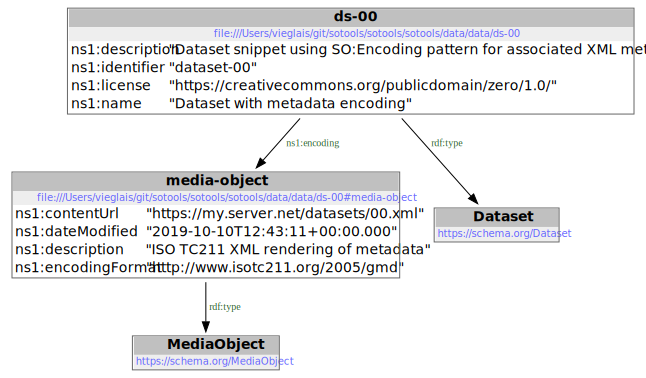

In [4]:
import os
import sotools.common

data_base = "sotools/data/data/"
g_00 = sotools.common.loadJsonldGraph(os.path.join(data_base, "ds_00.json"))
sotools.common.renderGraph(g_00)

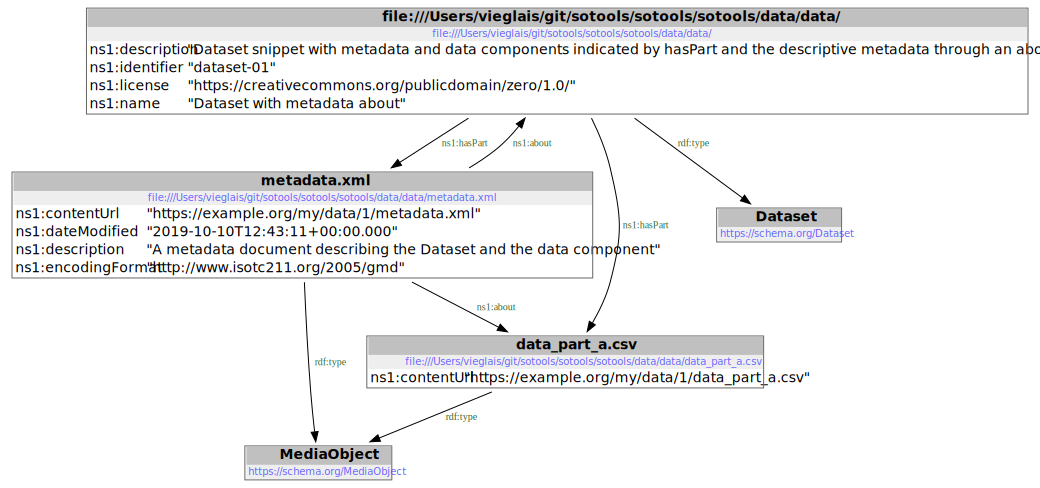

In [5]:
g_01 = sotools.common.loadJsonldGraph(os.path.join(data_base, "ds_01.json"))
sotools.common.renderGraph(g_01)


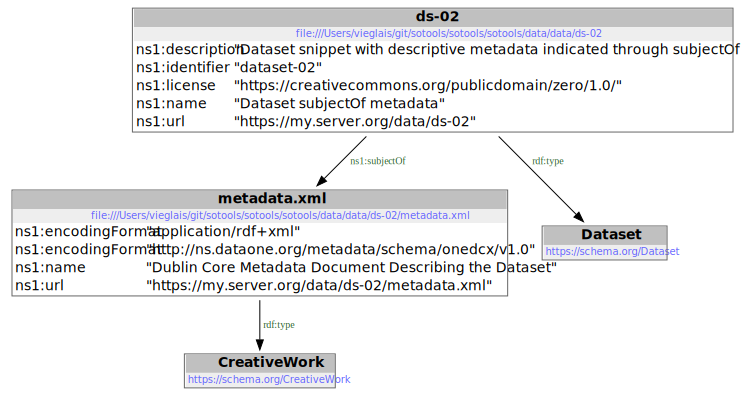

In [6]:
g_02 = sotools.common.loadJsonldGraph(os.path.join(data_base, "ds_02.json"))
sotools.common.renderGraph(g_02)
